In [1]:
!pip install visualkeras


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
!pip install pydot


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Dense, Flatten,MaxPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import  plot_model
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from itertools import product

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import visualkeras 

import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
x_train = pd.read_csv('train.csv')
x_test = pd.read_csv('test.csv')

In [9]:
x_train.head().style.background_gradient(cmap='Dark2_r')

In [10]:
x_train.describe().style.background_gradient(cmap='Dark2_r')

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [11]:
x_train.isnull().sum().sum()

0

In [12]:
x_test.isnull().sum().sum()

0

In [13]:
y_train = x_train['label']
x_train = x_train.drop(['label'], axis=1)

In [14]:
pd.Series(y_train).value_counts().rename_axis('unique_values').to_frame('counts')

,counts
unique_values,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [15]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


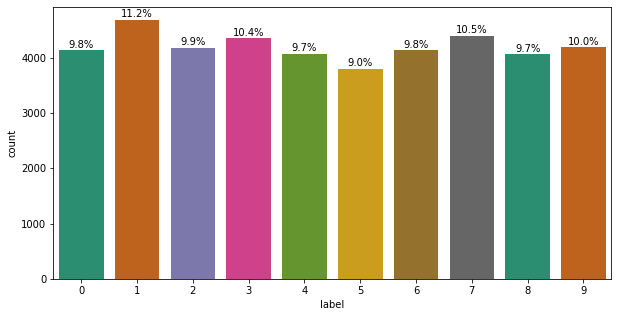

In [16]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = y_train, palette = 'Dark2')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

In [17]:
print("Shape of training data", x_train.shape)
print("\nShape of test data", x_test.shape)

Shape of training data (42000, 784)

Shape of test data (28000, 784)


In [18]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

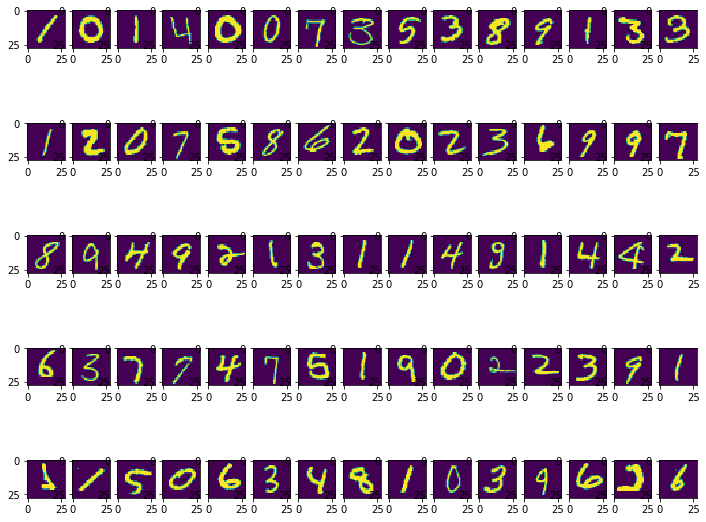

In [19]:
plt.figure(figsize=(12,10))
x, y = 15, 5
for i in range(75):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i],interpolation='nearest')
plt.show()

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
y_categ_train = to_categorical(y_train,K)

In [22]:
y_train.head(1)

0    1
Name: label, dtype: int64

In [23]:
print("\n Encoded y_train first row",y_categ_train[1])


 Encoded y_train first row [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
from sklearn.model_selection import train_test_split
x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_categ_train, test_size = 0.1, random_state=42)

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',)) 
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [31]:
model.fit(x_train1,y_train1,validation_data = (x_val,y_val),epochs=1)

1182/1182 [==============================] - 15s 13ms/step - loss: 0.1822 - accuracy: 0.9445 - val_loss: 0.0814 - val_accuracy: 0.9750


In [32]:
score = model.evaluate(x_val, y_val, verbose = 10 )
print ( 'Loss is :', score[0], '\nTraining Accuracy is :', score[1] )

Loss is : 0.08141025900840759 
Training Accuracy is : 0.9750000238418579


In [33]:
predict_y=model.predict(x_val)
y_val_hat=np.argmax(predict_y,axis=1)
y_val_org = np.argmax(y_val, axis = 1) 

132/132 [==============================] - 0s 3ms/step


In [34]:
layers = model.layers
filters, biases = model.layers[0].get_weights()
layer_outputs = model.layers[0].output
model_Input = model.input
print('Layer Name is :', layers[0].name, '\nFitler Shaper:',filters.shape)

Layer Name is : conv2d 
Fitler Shaper: (4, 4, 1, 32)


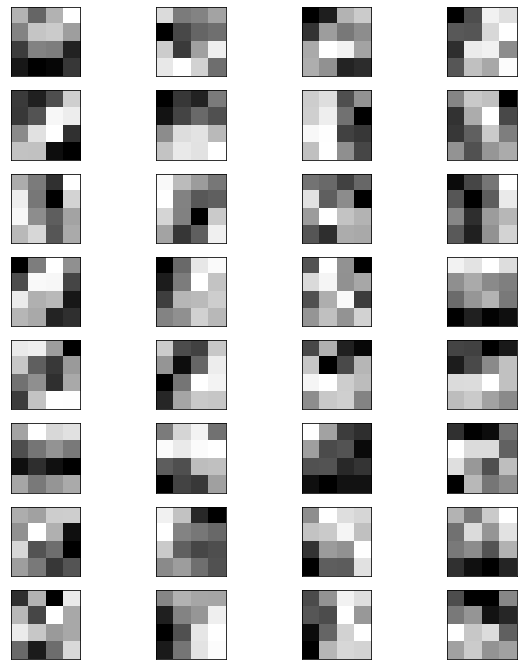

In [35]:
f = plt.figure(figsize = (10,12))
columns = 4
rows = 8
n_filters = columns * rows
for i in range(1, n_filters + 1):
    fil = filters[:,:,:,i-1]
    f = plt.subplot(rows, columns, i)
    f.set_xticks([])
    f.set_yticks([])
    plt.imshow(fil[: ,: ,0], cmap = 'gray')

plt.show()


In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Dark2):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

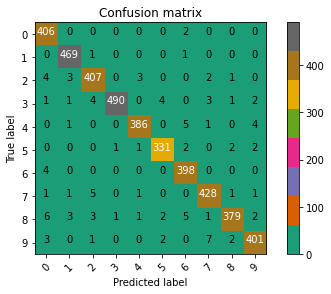

In [37]:
confusion_mtx = confusion_matrix(y_val_org, y_val_hat) 
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [38]:
print(classification_report(y_val_org,y_val_hat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.97       408
           1       0.98      1.00      0.99       471
           2       0.97      0.97      0.97       420
           3       1.00      0.97      0.98       506
           4       0.98      0.97      0.98       397
           5       0.98      0.98      0.98       339
           6       0.96      0.99      0.98       402
           7       0.97      0.98      0.97       438
           8       0.98      0.94      0.96       403
           9       0.97      0.96      0.97       416

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.98      0.97      0.97      4200



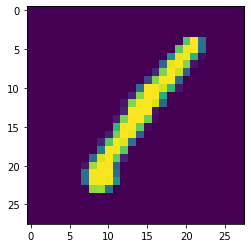

In [39]:
test_im = x_train[0]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')

1/1 [==============================] - 0s 45ms/step


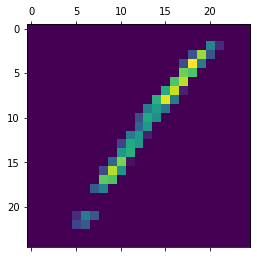

In [40]:
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

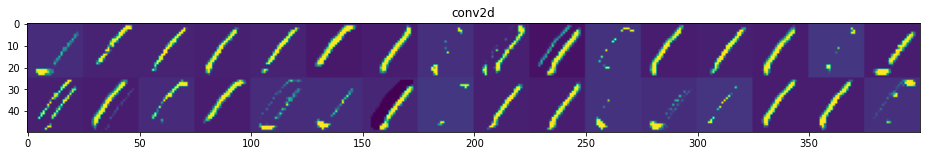

In [41]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

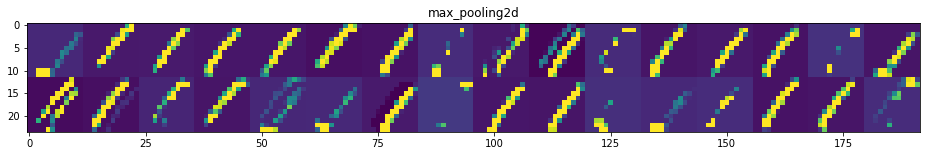

In [42]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('max'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [43]:
datagen  =  ImageDataGenerator(   
    rotation_range=15,
    width_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.0,
    horizontal_flip=True,
    vertical_flip=False)

datagen.fit(x_train)

In [44]:
checkpoint_callback = ModelCheckpoint(filepath='CNN-logo.h5',
                      monitor='val_accuracy', mode='max', save_best_only=True)
earlystopping_callback = EarlyStopping(monitor='loss', patience=3)

In [45]:
batch_size = 100
steps = x_train.shape[0]//batch_size

In [46]:
train_generator = datagen.flow(x_train1, y_train1, batch_size)
Val_generator = datagen.flow(x_val, y_val, batch_size)

In [47]:
h = model.fit_generator(train_generator, validation_data = Val_generator,epochs=1, steps_per_epoch = steps,callbacks=[checkpoint_callback, earlystopping_callback])

420/420 [==============================] - 13s 30ms/step - loss: 0.6095 - accuracy: 0.8087 - val_loss: 0.3336 - val_accuracy: 0.8948


In [48]:
res = model.predict(x_test)
res = np.argmax(res,axis = 1)
res = pd.Series(res, name="Label")
submission = pd.concat([pd.Series(range(1 ,28001) ,name = "ImageId"),   res],axis = 1)
submission.head(10)

875/875 [==============================] - 3s 3ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,9
6,7,0
7,8,3
8,9,0
9,10,3


In [49]:
submission.to_csv('submission.csv',index=False)